In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
file_path = r'C:\Users\Harold\Desktop\NFC\Data\MPG Ranch\Thrush Classifier Segment Results.pkl'
segments = pd.read_pickle(file_path)

In [3]:
segments.head()

,fold,percent,segment_type,station,detector,start_time,spectra,features,target,prediction
0,1,10,Training,Floodplain NFC,Thrush,2014-10-16 06:46:34+00:00,"[[111.579, 122.015, 119.151, 127.989, 127.747,...","[0.0830587, 0.0908279, 0.0886958, 0.0952749, 0...",0,0
1,1,10,Training,Ridge,Thrush,2014-09-02 12:10:27+00:00,"[[124.374, 123.436, 115.752, 206.998, 219.91, ...","[0.0746583, 0.0740954, 0.069483, 0.124256, 0.1...",1,1
2,1,10,Training,Ridge,Thrush,2014-09-21 12:38:08+00:00,"[[128.907, 121.657, 106.629, 154.235, 189.679,...","[0.0844017, 0.0796548, 0.0698154, 0.100985, 0....",1,1
3,1,10,Training,Sheep Camp,Thrush,2013-08-31 12:12:09+00:00,"[[136.215, 101.027, 73.2842, 170.036, 216.509,...","[0.0864804, 0.0641397, 0.0465267, 0.107953, 0....",1,1
4,1,10,Training,Floodplain NFC,Thrush,2014-08-31 06:26:28+00:00,"[[229.903, 198.87, 222.261, 207.778, 194.648, ...","[0.113346, 0.0980463, 0.109579, 0.102438, 0.09...",0,0


In [4]:
def showSegments(segments, pageNum, target, prediction, segmentType='Test', pageWidth=10, pageHeight=10):
    
    segments = segments[
        (segments['segment_type'] == segmentType) & \
        (segments['target'] == target) & \
        (segments['prediction'] == prediction)]
    
    numSegments = len(segments)
    
    pageSize = pageWidth * pageHeight
    numPages = int(math.ceil(numSegments / float(pageSize)))
    
    if pageNum <= 0 or pageNum > numPages:
        
        print 'Invalid page number {}. Please specify a number in [{}, {}].'.format(pageNum, 1, numPages)
        
    else:
        
        startIndex = pageSize * (pageNum - 1)
        endIndex = pageSize * pageNum
    
        print 'Page {} of {}, segments {} to {} of {}'.format(pageNum, numPages, startIndex + 1, endIndex, numSegments)
        
        plt.figure(figsize=(12, pageHeight))

        for i, spectra in enumerate(segments['spectra'][startIndex:endIndex]):
            image = spectra.transpose()
            plt.subplot(pageHeight, pageWidth, i + 1)
            plt.imshow(image, origin='lower', interpolation='none', cmap='gray_r')
            plt.axis('off')


Page 2 of 10, segments 101 to 200 of 949


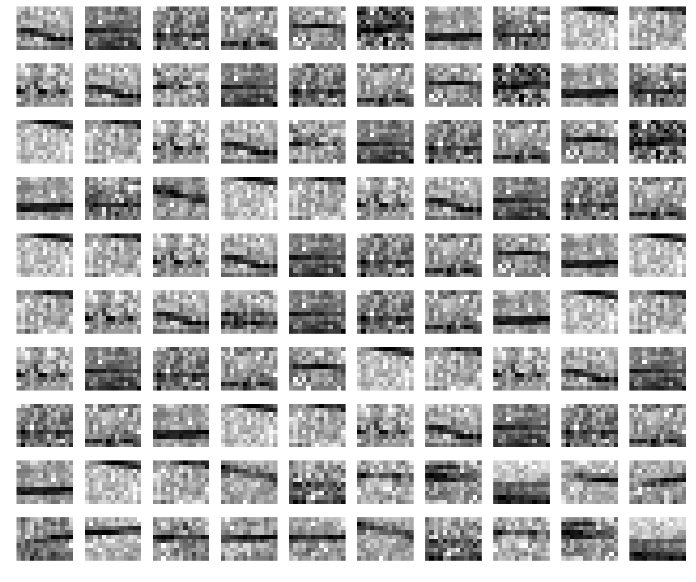

In [5]:
showSegments(segments, pageNum=2, target=1, prediction=0, pageHeight=10)